In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#python3 -m pip install numpy

In [84]:
def get_df(bot1, bot2):
    dataset = pd.read_csv('./' + bot1 + '_vs_' + bot2 + '.csv')
    # print(dataset.describe())
    # print(dataset.head())
    # print(dataset[dataset["winner"]==bot1].describe())
    # print(dataset[dataset["winner"]==bot2].describe())
    # plt.scatter(dataset["appleEaten0"], dataset["appleEaten1"])

    return dataset

# AdderBoaCobra VS RollOutBot

In [85]:
adder_rollout_df = get_df("AdderBoaCobra", "RolloutBot")
adder_rollout_df

,iteration,winner,appleEaten0,appleEaten1,duration
0,0,AdderBoaCobra,4,2,15.329
1,1,AdderBoaCobra,4,3,11.017
2,2,AdderBoaCobra,4,1,14.893
3,3,AdderBoaCobra,11,10,76.588
4,4,tie,13,13,75.345
5,5,tie,3,3,27.265
6,6,tie,7,7,18.194
7,7,RolloutBot,1,3,6.769
8,8,tie,1,1,3.763
9,9,tie,0,0,3.756


In [95]:
aggregations = {
    "appleEaten0" : [np.mean, np.sum],
    "appleEaten1" : [np.mean, np.sum],
    "duration" : [np.mean, np.sum],
    "winner" : ["count"],
}

In [102]:
def get_bots_playing(df):
    bots = list(df["winner"].unique())

    print(bots)

    try:
        bots.remove("tie")
    except:
        pass
    bot1, bot2 = bots

    return bot1, bot2

In [63]:
def add_score_columns(df):
    """
        create a tournament score for each bot
        win:  3 points
        tie:  1 point
        loss: 0 points

        returns (points: bot 1), (points: bot 2), (games played) 
    """

    bot1, bot2 = get_bots_playing(df)
    
    bot1_points = 0
    bot2_points = 0
    for index, row in df.iterrows():

        if row["winner"] == bot1:
            bot1_points += 3
        elif row["winner"] == bot2:
            bot2_points += 3
        else:
            bot1_points += 1
            bot2_points += 1

    return bot1_points, bot2_points, len(df), len(df) - len(df[df["winner"] == "tie"])

bot1_points, bot2_points, total_games, games_without_ties = add_score_columns(adder_rollout_df)
print(bot1_points, bot2_points, total_games, games_without_ties)

103 31 50 34


In [80]:
def get_running_sum(df):
    """
        return df with running total of apples eaten
    """

    bot1, bot2 = get_bots_playing(df)
    
    bot1_points = 0
    bot2_points = 0
    bot1_apples_total = 0
    bot2_apples_total = 0
    df[f"{bot1} total"] = df["appleEaten0"].cumsum()
    df[f"{bot2} total"] = df["appleEaten1"].cumsum()


    
        
    return df[["iteration", "appleEaten0", f"{bot1} total", "appleEaten1",  f"{bot2} total"]]
    

total_apples_eaten_df = get_running_sum(adder_rollout_df)
# total_apples_eaten_df["iter"]
total_apples_eaten_df

,iteration,appleEaten0,AdderBoaCobra total,appleEaten1,RolloutBot total
0,0,4,4,2,2
1,1,4,8,3,5
2,2,4,12,1,6
3,3,11,23,10,16
4,4,13,36,13,29
5,5,3,39,3,32
6,6,7,46,7,39
7,7,1,47,3,42
8,8,1,48,1,43
9,9,0,48,0,43


<AxesSubplot: xlabel='iteration'>

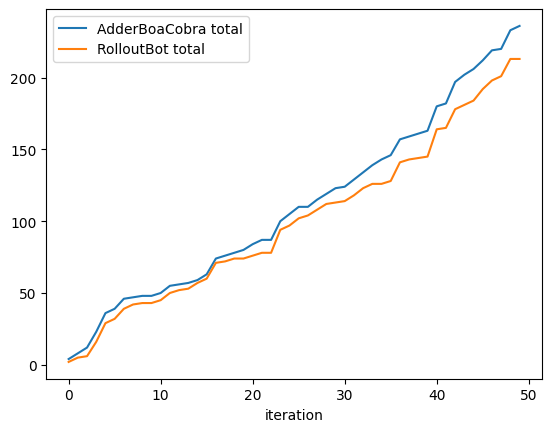

In [81]:
bot1, bot2 = get_bots_playing(adder_rollout_df)
total1 = f"{bot1} total"
total2 = f"{bot2} total"

total_apples_eaten_df.plot(kind="line", x="iteration", y=[total1, total2])

## 1. Adder vs Rollout 

In [96]:
# bots playing
def get_tournament_statistics(df):
    bot1, bot2 = get_bots_playing(df)
    # average apples eaten:
    tournament_statistics_df = df.groupby("winner").agg(aggregations)
    bot1_points, bot2_points, total_games, games_without_ties = add_score_columns(df)
    tournament_statistics_df.loc[bot1 ,("Points (W=3 T=1)")] = bot1_points
    tournament_statistics_df.loc[bot2 ,("Points (W=3 T=1)")] = bot2_points

    tournament_statistics_df.loc[bot1 ,("Score", "Ties")] = tournament_statistics_df.loc[bot1,("winner", "count")] / total_games
    tournament_statistics_df.loc[bot1 ,("Score", "Without Ties")] = tournament_statistics_df.loc[bot1,("winner", "count")] / games_without_ties

    tournament_statistics_df.loc[bot2 ,("Score", "Ties")] = tournament_statistics_df.loc[bot2,("winner", "count")] / total_games
    tournament_statistics_df.loc[bot2 ,("Score", "Without Ties")] = tournament_statistics_df.loc[bot2,("winner", "count")] / games_without_ties


    # tournament_statistics_df.loc[bot1 ,("Score", "Ties")] = bot1_points / total_games
    # tournament_statistics_df.loc[bot1 ,("Score", "Without Ties")] = bot1_points / games_without_ties
    # tournament_statistics_df[""]
    try:
        tournament_statistics_df = tournament_statistics_df.drop(index="tie")
    except:
        # no ties
        pass
    return tournament_statistics_df
get_tournament_statistics(adder_rollout_df)

appleEaten0      appleEaten1        duration          winner  \
                     mean  sum        mean  sum       mean      sum  count   
winner                                                                       
AdderBoaCobra    5.655172  164    4.655172  135  28.251483  819.293     29   
RolloutBot       2.000000   10    3.200000   16  12.479000   62.395      5   

              Points (W=3 T=1) Score               
                                Ties Without Ties  
winner                                             
AdderBoaCobra            103.0  0.58     0.852941  
RolloutBot                31.0  0.10     0.147059

## 2. Adder vs PUCT

In [86]:
get_tournament_statistics(get_df("AdderBoaCobra", "PUCTBot"))

appleEaten0      appleEaten1         duration           winner  \
                     mean  sum        mean  sum        mean       sum  count   
winner                                                                         
AdderBoaCobra    5.960000  149    4.280000  107  153.569720  3839.243     25   
PUCTBot          5.769231   75    7.384615   96  161.315769  2097.105     13   

              Points (W=3 T=1)     Score               
                                    Ties Without Ties  
winner                                                 
AdderBoaCobra             79.0  0.595238     0.657895  
PUCTBot                   43.0  0.309524     0.342105

## 3. Adder vs UCT

In [97]:
get_tournament_statistics(get_df("AdderBoaCobra", "TheBot"))

appleEaten0      appleEaten1         duration           winner  \
                     mean  sum        mean  sum        mean       sum  count   
winner                                                                         
AdderBoaCobra    5.234043  246    2.702128  127  205.454085  9656.342     47   
TheBot           5.000000    5    1.000000    1  118.912000   118.912      1   

              Points (W=3 T=1) Score               
                                Ties Without Ties  
winner                                             
AdderBoaCobra            143.0  0.94     0.979167  
TheBot                     5.0  0.02     0.020833

## 4. UCT vs Rollout

In [91]:
get_tournament_statistics(get_df("UCT", "RolloutBot"))

appleEaten0     appleEaten1      duration           winner  \
                  mean sum        mean  sum     mean       sum  count   
winner                                                                  
RolloutBot    1.844444  83    4.888889  220  60.9606  2743.227     45   
TheBot        3.600000  18    1.600000    8  27.1598   135.799      5   

           Points (W=3 T=1) Score               
                             Ties Without Ties  
winner                                          
RolloutBot            135.0   0.9          0.9  
TheBot                 15.0   0.1          0.1

## 5. PUCT vs UCT

In [105]:
get_tournament_statistics(get_df("PUCTBot", "TheBot"))

['PUCTBot', 'TheBot', 'tie']
['PUCTBot', 'TheBot', 'tie']


appleEaten0      appleEaten1        duration           winner  \
               mean  sum        mean sum        mean       sum  count   
winner                                                                  
PUCTBot     7.95122  326     2.02439  83  189.405146  7765.611     41   
TheBot      1.50000    3     4.00000   8  325.004000   650.008      2   

        Points (W=3 T=1)     Score               
                              Ties Without Ties  
winner                                           
PUCTBot            124.0  0.931818     0.953488  
TheBot               7.0  0.045455     0.046512

## 6. PUCT vs Rollout

In [104]:
get_tournament_statistics(get_df("PUCTBot", "RolloutBot"))

['RolloutBot', 'PUCTBot', 'tie']
['RolloutBot', 'PUCTBot', 'tie']


appleEaten0      appleEaten1         duration           winner  \
                  mean  sum        mean  sum        mean       sum  count   
winner                                                                      
PUCTBot       7.190476  151    8.571429  180  124.030905  2604.649     21   
RolloutBot    5.208333  125   10.250000  246  124.820583  2995.694     24   

           Points (W=3 T=1) Score               
                             Ties Without Ties  
winner                                          
PUCTBot                68.0  0.42     0.466667  
RolloutBot             77.0  0.48     0.533333